In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
customers_df = pd.read_csv(r'files_for_lab\customers_df.csv')
cols = []
for i in range(len(customers_df.columns)):
    cols.append(customers_df.columns[i].lower().replace(' ', '_'))
customers_df.columns = cols

# customers_df = customers_df.drop ('unnamed:_0', axis = 1)

In [4]:
customers_no_outliers = pd.read_csv(r'files_for_lab\customers_no_outliers.csv')
cols = []
for i in range(len(customers_no_outliers.columns)):
    cols.append(customers_no_outliers.columns[i].lower().replace(' ', '_'))
customers_no_outliers.columns = cols

In [3]:
customers_outliers = pd.read_csv(r'files_for_lab\customers_outliers.csv')
cols = []
for i in range(len(customers_outliers.columns)):
    cols.append(customers_outliers.columns[i].lower().replace(' ', '_'))
customers_outliers.columns = cols

In [5]:
print(customers_df.shape)
print(customers_no_outliers.shape)
print(customers_outliers.shape)

(9134, 51)
(8681, 51)
(453, 51)


In [6]:
print(customers_df.isna().sum().sum())
print(customers_no_outliers.isna().sum().sum())
print(customers_outliers.isna().sum().sum())

0
0
0


In [7]:
print(customers_df.duplicated().sum())
print(customers_no_outliers.duplicated().sum())
print(customers_outliers.duplicated().sum())

0
0
0


In [8]:
customers_df.columns
numerical_columns = customers_df.select_dtypes(include = ['number']).columns.tolist()
customers_df = customers_df[['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount',
 'day',
 'month',
 'year',
 'coverage_ordinal',
 'employment_status_ordinal',
 'location_code_ordinal',
 'vehicle_size_ordinal']]
customers_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year,coverage_ordinal,employment_status_ordinal,location_code_ordinal,vehicle_size_ordinal
0,2763.519279,56274,69,32,5,0,1,384.811147,24,2,2011,0,2,1,1
1,6979.535903,0,94,13,42,0,8,1131.464935,31,1,2011,1,0,1,1
2,12887.431650,48767,108,18,38,0,2,566.472247,19,2,2011,2,2,1,1
3,7645.861827,0,106,18,65,0,7,529.881344,20,1,2011,0,0,1,1
4,2813.692575,43836,73,12,44,0,1,138.130879,3,2,2011,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,10,2,2011,0,2,2,1
9130,3096.511217,21604,79,14,28,0,1,379.200000,12,2,2011,1,2,1,1
9131,8163.890428,0,85,9,37,3,2,790.784983,6,2,2011,1,0,1,1
9132,7524.442436,21941,96,34,3,0,3,691.200000,3,2,2011,1,2,1,2


In [9]:
customers_no_outliers.columns
numerical_columns = customers_no_outliers.select_dtypes(include=['number']).columns.tolist()
customers_no_outliers = customers_no_outliers[['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount',
 'day',
 'month',
 'year',
 'coverage_ordinal',
 'employment_status_ordinal',
 'location_code_ordinal',
 'vehicle_size_ordinal']]
customers_no_outliers

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year,coverage_ordinal,employment_status_ordinal,location_code_ordinal,vehicle_size_ordinal
0,2763.519279,56274,69,32,5,0,1,384.811147,24,2,2011,0,2,1,1
1,12887.431650,48767,108,18,38,0,2,566.472247,19,2,2011,2,2,1,1
2,7645.861827,0,106,18,65,0,7,529.881344,20,1,2011,0,0,1,1
3,2813.692575,43836,73,12,44,0,1,138.130879,3,2,2011,0,2,0,1
4,8256.297800,62902,69,14,94,0,2,159.383042,25,1,2011,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,23405.987980,71941,73,18,89,0,2,198.234764,10,2,2011,0,2,2,1
8677,3096.511217,21604,79,14,28,0,1,379.200000,12,2,2011,1,2,1,1
8678,8163.890428,0,85,9,37,3,2,790.784983,6,2,2011,1,0,1,1
8679,7524.442436,21941,96,34,3,0,3,691.200000,3,2,2011,1,2,1,2


In [10]:
customers_outliers.columns
numerical_columns = customers_outliers.select_dtypes(include = ['number']).columns.tolist()
customers_outliers = customers_outliers[['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount',
 'day',
 'month',
 'year',
 'coverage_ordinal',
 'employment_status_ordinal',
 'location_code_ordinal',
 'vehicle_size_ordinal']]
customers_outliers

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year,coverage_ordinal,employment_status_ordinal,location_code_ordinal,vehicle_size_ordinal
0,6979.535903,0,94,13,42,0,8,1131.464935,31,1,2011,1,0,1,1
1,6781.270203,0,104,30,3,1,5,982.399613,4,2,2011,0,0,1,1
2,4022.963529,0,117,6,1,0,1,975.107098,26,1,2011,0,0,1,1
3,9047.119209,0,127,30,11,0,6,1087.995426,21,1,2011,1,0,1,1
4,16936.271470,39411,217,4,29,2,4,1122.658899,24,1,2011,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,32104.699570,89546,266,4,18,1,2,2452.894264,16,2,2011,2,2,1,2
449,15245.254950,30205,195,24,1,0,4,1329.957905,1,1,2011,0,2,1,2
450,5619.689084,0,153,25,5,0,1,1027.000029,26,1,2011,2,0,1,1
451,3622.872124,0,108,23,52,0,1,1254.177129,25,1,2011,0,0,1,1


In [11]:
correlations_customers_df = customers_df.corr()['total_claim_amount']
correlations_customers_df.sort_values(ascending = False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
coverage_ordinal                 0.279078
location_code_ordinal            0.254766
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
month                            0.006820
months_since_policy_inception    0.003335
number_of_policies              -0.002354
day                             -0.005707
number_of_open_complaints       -0.014241
vehicle_size_ordinal            -0.073799
employment_status_ordinal       -0.338575
income                          -0.355254
year                                  NaN
Name: total_claim_amount, dtype: float64

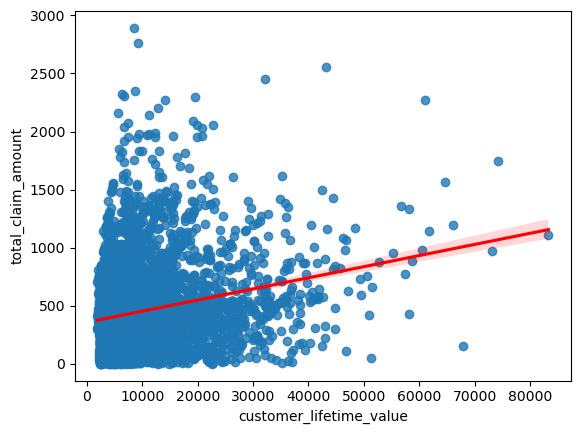

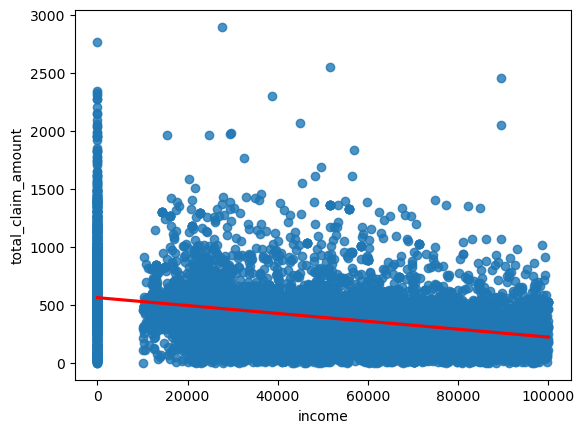

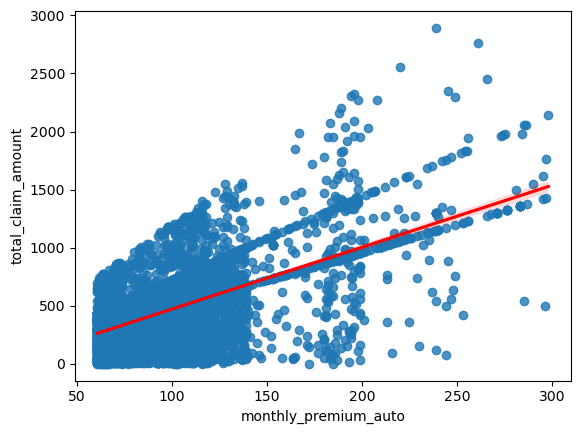

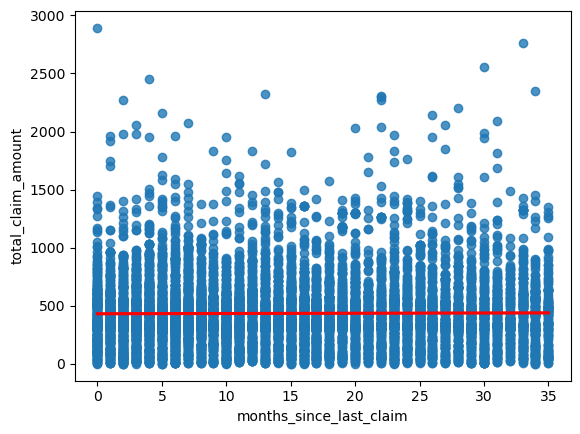

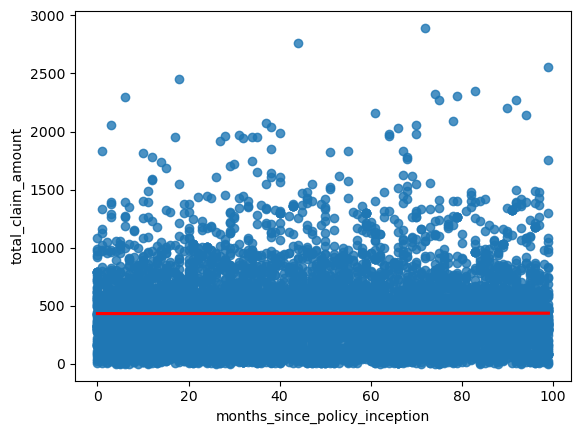

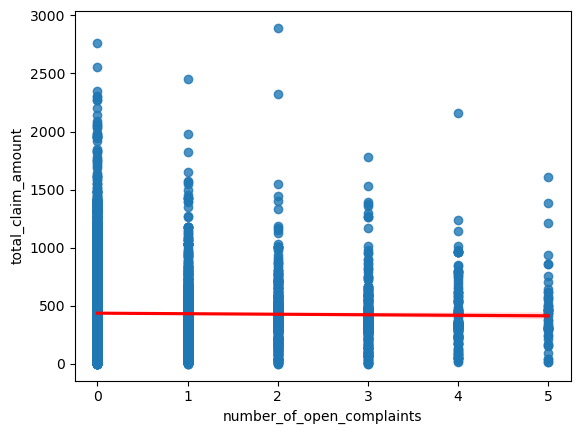

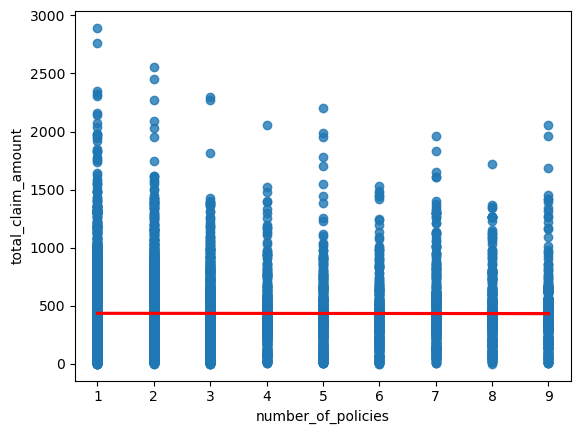

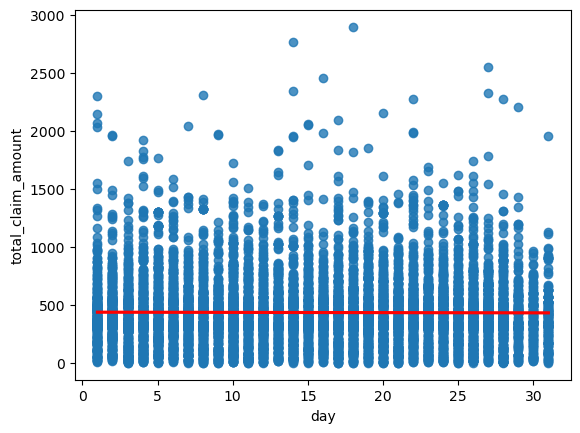

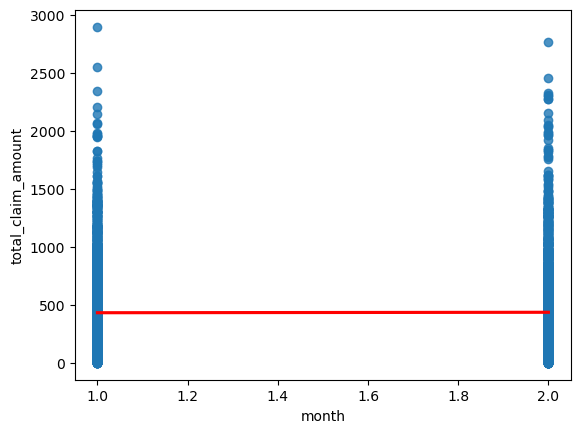

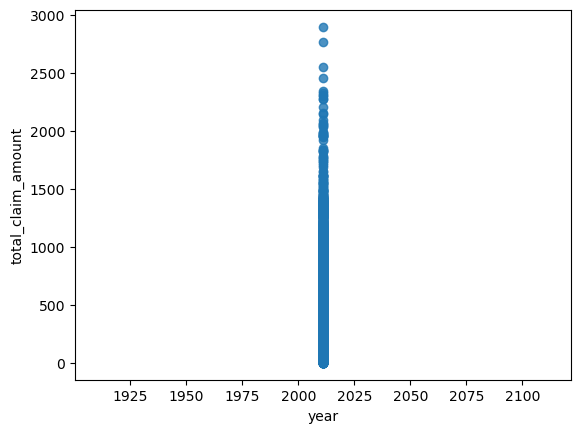

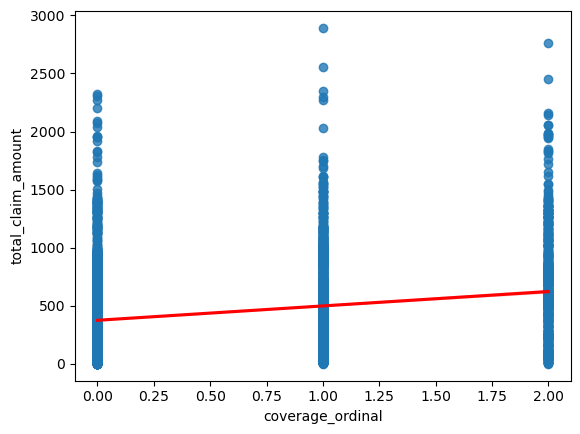

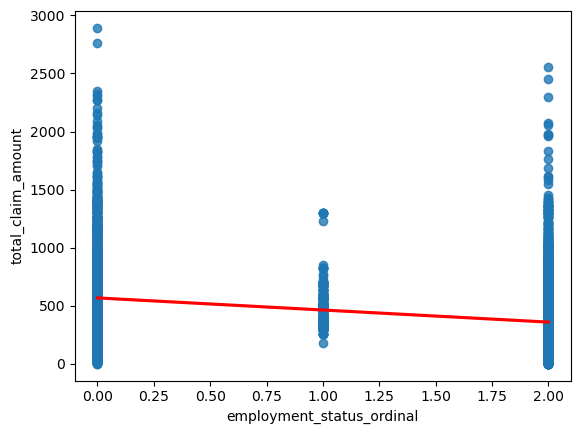

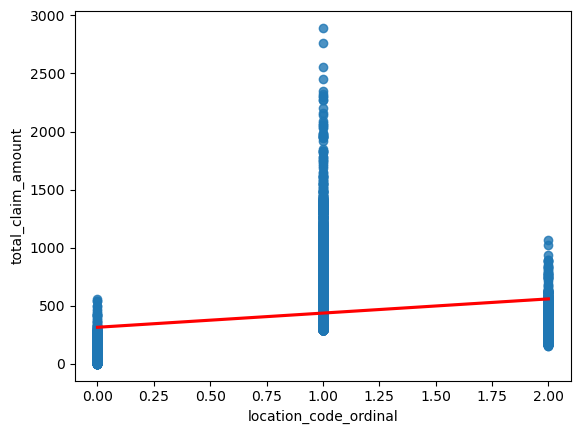

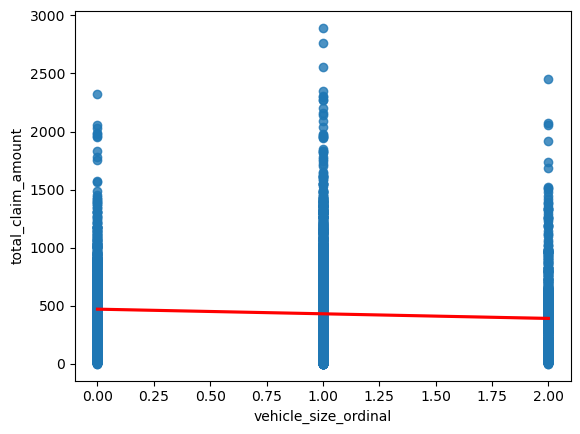

In [12]:
def plot_corr(customers_df, target_variable = 'total_claim_amount'): 
    for column in customers_df:
        if column != target_variable:
            sns.regplot(x = column, y = target_variable, data = customers_df, scatter = True, line_kws = {'color': 'red'})
            plt.show()

plot_corr(customers_df)

In [13]:
from sklearn.model_selection import train_test_split

Y = customers_df['total_claim_amount']
X = customers_df[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal', 'location_code_ordinal', 'customer_lifetime_value']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X = sm.add_constant(X)
model = sm.OLS(Y_train,X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     total_claim_amount   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              8408.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):                        0.00
Time:                        15:57:11   Log-Likelihood:                         -48528.
No. Observations:                7307   AIC:                                  9.707e+04
Df Residuals:                    7301   BIC:                                  9.711e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
monthly_premium_auto          5.1192      0.056     91.206      0.000       5.009       5.229
employment_status_ordinal   -56.2091      3.765    -14.930      0.000     -63.589     -48.829
income                       -0.0019      0.000    -16.359      0.000      -0.002      -0.002
coverage_ordinal             -1.8044      3.686     -0.490      0.624      -9.030       5.421
location_code_ordinal       109.9975      3.203     34.342      0.000     103.719     116.276
customer_lifetime_value      -0.0005      0.000     -1.353      0.176      -0.001       0.000
==============================================================================
Omnibus:                     1405.868   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7667.443
Skew:                           0.815   Prob(JB):                         0.00
Kurtosis:                       7.746   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)

predictions = lm.predict(X_test)

print('R2 value is = ', round(r2_score(Y_test, predictions), 2))
print('The intercept of the model is = ', lm.intercept_)
print('The coefficients of the model are = ',lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print('The mse of the model is = ', mse)
print('The root mse of the model is = ', np.sqrt(mse))
print('The mean absolute error of the model is = ', mae)

R2 value is =  0.57
The intercept of the model is =  -32.46264194092652
The coefficients of the model are =  [ 5.32952738e+00 -5.37686715e+01 -1.87781294e-03 -4.05450973e+00
  1.16703893e+02 -4.64735577e-04]
The mse of the model is =  36411.266431489355
The root mse of the model is =  190.8173640722703
The mean absolute error of the model is =  140.324086132157


In [16]:
validation = pd.DataFrame({'Actual':Y_test, 'Predicted':predictions})
validation['diff'] = (validation['Predicted'] - validation['Actual'])/validation['Actual']
validation['diff'].mean() # 90%
validation.sort_values('diff')

,Actual,Predicted,diff
7321,154.713524,22.649102,-0.853606
7081,89.398794,16.402046,-0.816529
4696,151.973156,34.419922,-0.773513
7616,162.557048,40.018554,-0.753818
5320,126.634634,36.391330,-0.712627
...,...,...,...
8888,6.342791,383.609685,59.479635
3234,4.074222,338.034883,81.969186
2065,3.468912,318.123101,90.706881
3723,2.549986,257.607576,100.023133


In [18]:
y = customers_df['total_claim_amount']
X = customers_df[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [19]:
predictions = model.predict(X_test)

print('R2 value is = ', round(r2_score(Y_test, predictions), 2))
print('The intercept of the model is = ', lm.intercept_)
print('The coefficients of the model are = ', lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print('The mse of the model is = ', mse)
print('The root mse of the model is = ', np.sqrt(mse))
print('The mean absolute error of the model is = ', mae)

R2 value is =  0.24
The intercept of the model is =  -32.46264194092652
The coefficients of the model are =  [ 5.32952738e+00 -5.37686715e+01 -1.87781294e-03 -4.05450973e+00
  1.16703893e+02 -4.64735577e-04]
The mse of the model is =  64545.9818171272
The root mse of the model is =  254.0590124697945
The mean absolute error of the model is =  172.4433232113848


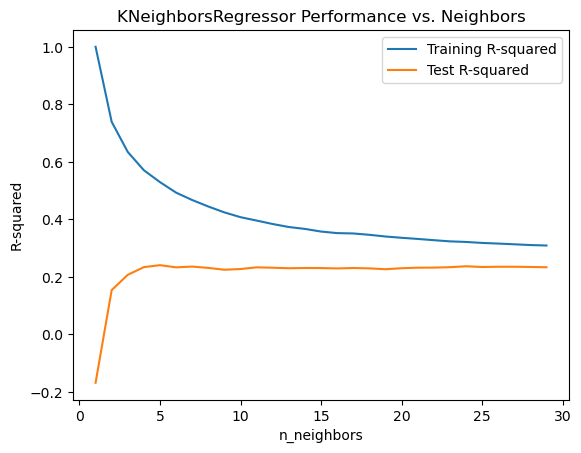

In [20]:
import matplotlib.pyplot as plt

training_performance = []
test_performance = []

# Range of 'n_neighbors' to test
neighbors_settings = range(1, 30)

# Loop through each value in 'n_neighbors' to build, train, and test the model
for n_neighbors in neighbors_settings:
    # Create and train the model
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # Record training set R-squared
    training_performance.append(clf.score(X_train, y_train))
    
    # Record test set R-squared
    test_performance.append(clf.score(X_test, y_test))

# Plot the results
plt.plot(neighbors_settings, training_performance, label="Training R-squared")
plt.plot(neighbors_settings, test_performance, label="Test R-squared")
plt.ylabel("R-squared")
plt.xlabel("n_neighbors")
plt.title("KNeighborsRegressor Performance vs. Neighbors")
plt.legend()
plt.show()

In [21]:
correlations_customers_no_outliers = customers_no_outliers.corr()['total_claim_amount']
correlations_customers_no_outliers.sort_values(ascending = False)

total_claim_amount               1.000000
monthly_premium_auto             0.446886
location_code_ordinal            0.351065
coverage_ordinal                 0.226699
customer_lifetime_value          0.134456
day                              0.009115
month                            0.001490
number_of_policies              -0.012835
number_of_open_complaints       -0.015980
months_since_last_claim         -0.017016
months_since_policy_inception   -0.017188
vehicle_size_ordinal            -0.105697
employment_status_ordinal       -0.347316
income                          -0.368590
year                                  NaN
Name: total_claim_amount, dtype: float64

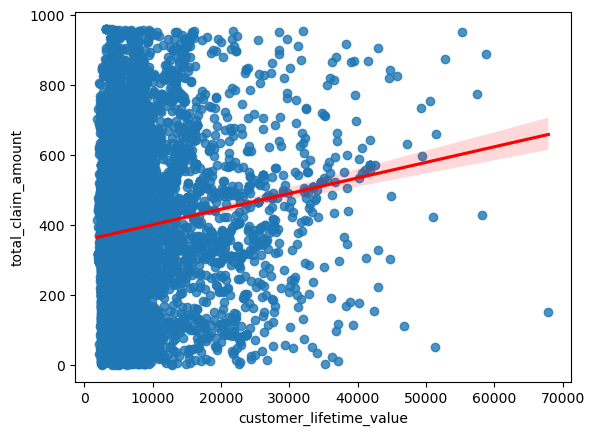

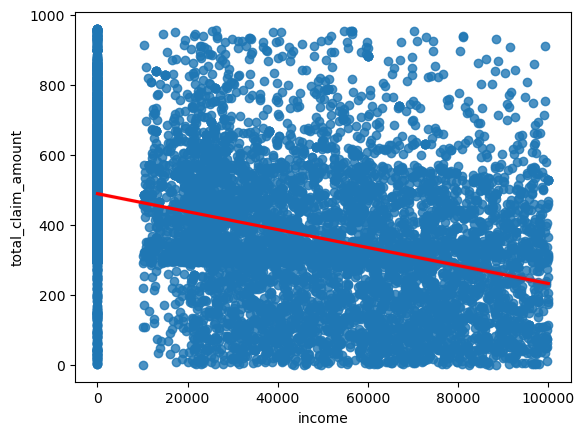

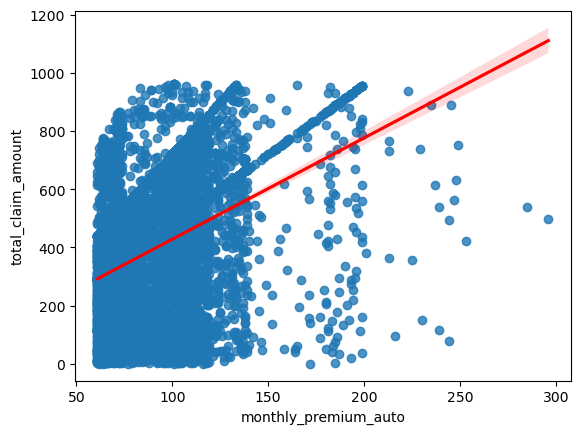

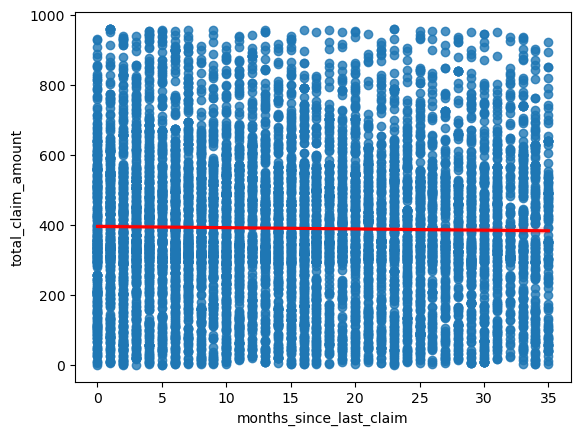

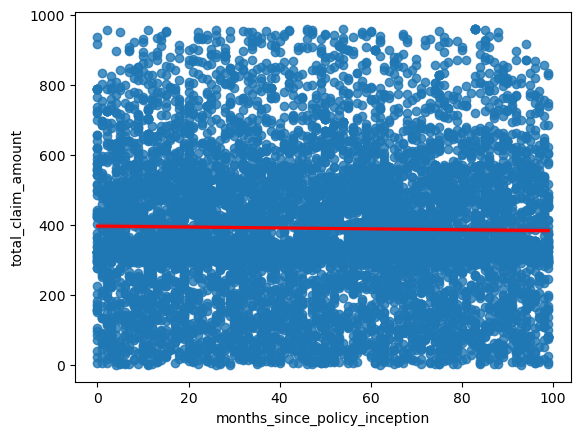

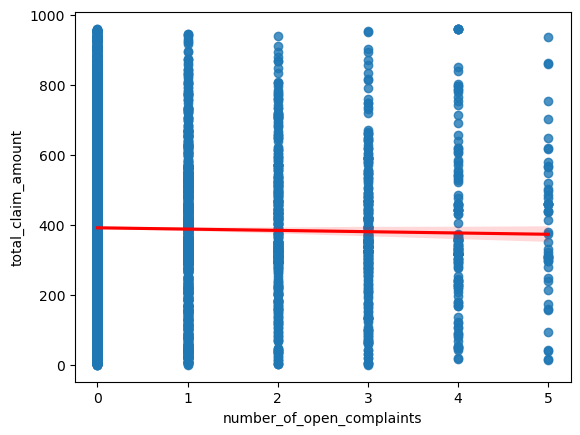

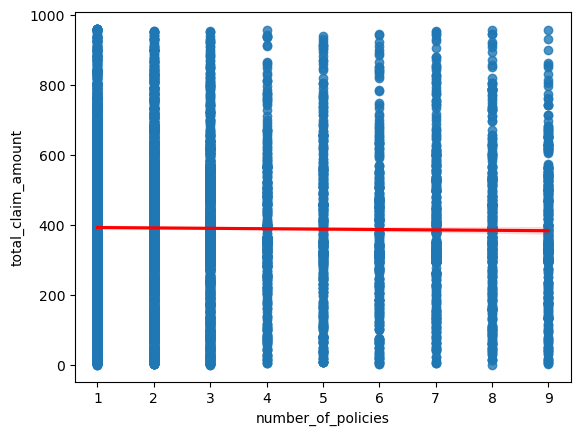

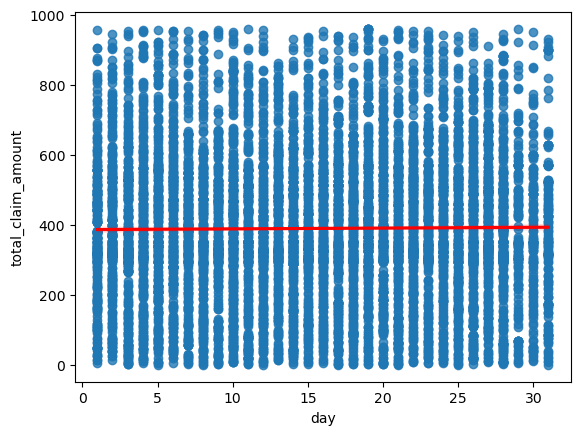

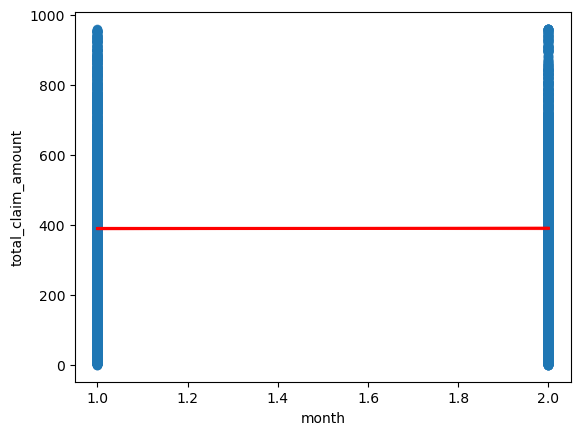

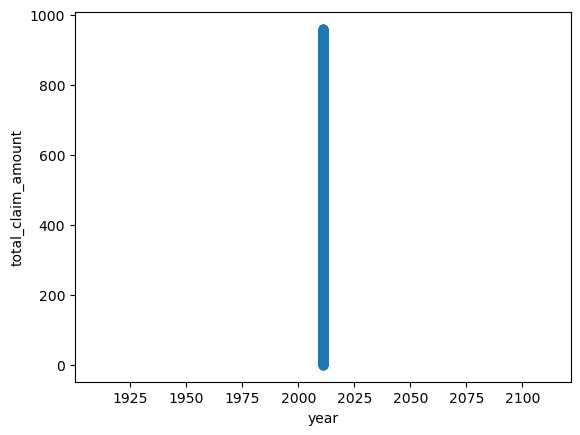

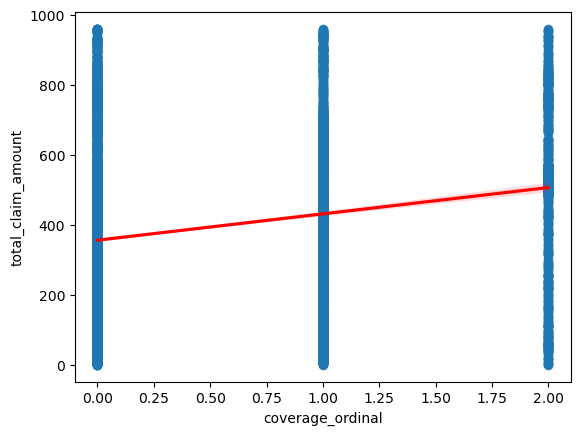

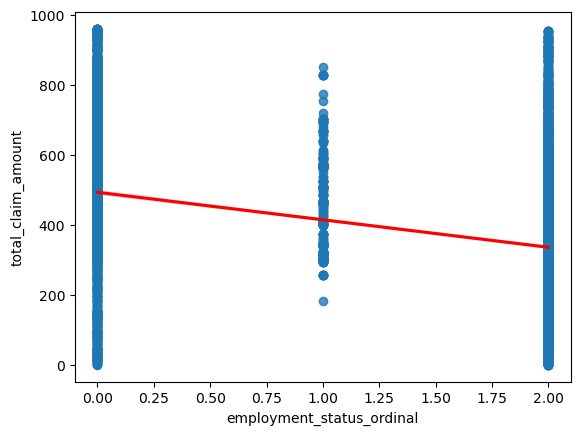

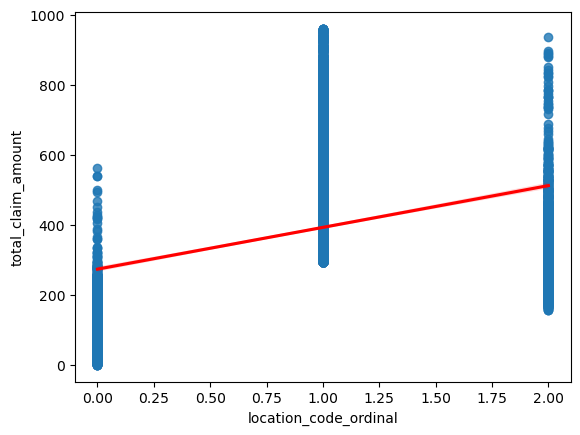

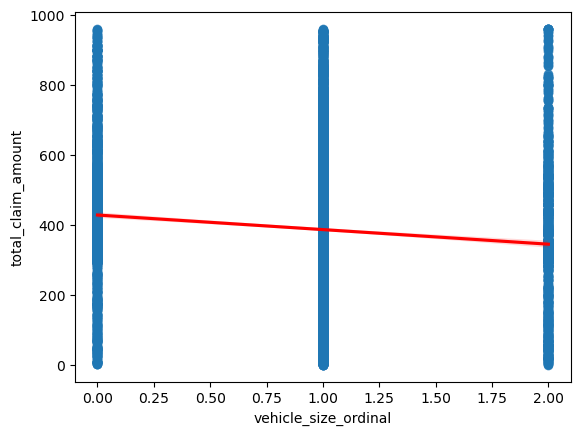

In [22]:
def plot_corr(customers_no_outliers, target_variable = 'total_claim_amount'): 
    for column in customers_no_outliers:
        if column != target_variable:
            sns.regplot(x = column, y = target_variable, data = customers_no_outliers, scatter = True, line_kws = {'color': 'red'})
            plt.show()

plot_corr(customers_no_outliers)

In [23]:
y = customers_no_outliers['total_claim_amount']
X = customers_no_outliers[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X = sm.add_constant(X)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     total_claim_amount   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              8556.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:13:40   Log-Likelihood:                         -44791.
No. Observations:                6944   AIC:                                  8.959e+04
Df Residuals:                    6938   BIC:                                  8.963e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
monthly_premium_auto          4.1834      0.053     78.347      0.000       4.079       4.288
employment_status_ordinal   -35.6155      3.187    -11.176      0.000     -41.863     -29.368
income                       -0.0017   9.88e-05    -16.827      0.000      -0.002      -0.001
coverage_ordinal              3.7246      3.167      1.176      0.240      -2.484       9.933
location_code_ordinal       126.5353      2.721     46.511      0.000     121.202     131.868
customer_lifetime_value      -0.0002      0.000     -0.694      0.488      -0.001       0.000
==============================================================================
Omnibus:                       62.383   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.186
Skew:                           0.003   Prob(JB):                     1.07e-22
Kurtosis:                       3.591   Cond. No.                     8.72e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

print("R2 value is = ", round(r2_score(y_test, predictions), 2))
print("The intercept of the model is = ", lm.intercept_)
print("The coefficients of the model are = ", lm.coef_)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("The mse of the model is = ", mse)
print("The root mse of the model is = ", np.sqrt(mse))
print("The mean absolute error of the model is = ", mae)

R2 value is =  0.46
The intercept of the model is =  75.35351746341013
The coefficients of the model are =  [ 3.56924204e+00 -4.01229512e+01 -1.72899418e-03  1.05528412e+01
  1.15102770e+02 -1.60445127e-04]
The mse of the model is =  23417.97367501628
The root mse of the model is =  153.02932292543244
The mean absolute error of the model is =  121.31475222243965


In [26]:
validation = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
validation['diff'] = (validation['Predicted'] - validation['Actual'])/validation['Actual']
validation['diff'].mean() # 195%
validation.sort_values('diff')

,Actual,Predicted,diff
499,787.993313,285.114077,-0.638177
4805,787.993313,285.114077,-0.638177
170,787.993313,285.114077,-0.638177
3768,905.699717,348.324832,-0.615408
2212,922.335972,358.077561,-0.611771
...,...,...,...
3088,4.074222,279.950807,67.712703
7038,2.028223,188.710113,92.042093
4459,2.540090,262.471291,102.331493
836,0.382107,266.120422,695.455239


In [27]:
y = customers_no_outliers['total_claim_amount']
X = customers_no_outliers[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 6)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [28]:
predictions = model.predict(X_test)

print("R2 value is = ",round(r2_score(y_test, predictions), 2))
print("The intercept of the model is = ", lm.intercept_)
print("The coefficients of the model are = ", lm.coef_)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("The mse of the model is = ", mse)
print("The root mse of the model is = ", np.sqrt(mse))
print("The mean absolute error of the model is = ", mae)

R2 value is =  0.18
The intercept of the model is =  75.35351746341013
The coefficients of the model are =  [ 3.56924204e+00 -4.01229512e+01 -1.72899418e-03  1.05528412e+01
  1.15102770e+02 -1.60445127e-04]
The mse of the model is =  35281.91421333015
The root mse of the model is =  187.83480564935283
The mean absolute error of the model is =  142.42859590596814


In [29]:
correlations_customers_outliers = customers_outliers.corr()['total_claim_amount']
correlations_customers_outliers.sort_values(ascending = False)

total_claim_amount               1.000000
monthly_premium_auto             0.414701
months_since_policy_inception    0.089750
customer_lifetime_value          0.084266
month                            0.059413
vehicle_size_ordinal             0.054450
months_since_last_claim          0.026508
number_of_open_complaints        0.011056
coverage_ordinal                -0.011197
day                             -0.030459
number_of_policies              -0.050021
location_code_ordinal           -0.050251
employment_status_ordinal       -0.089251
income                          -0.096091
year                                  NaN
Name: total_claim_amount, dtype: float64

In [32]:
Y = customers_outliers['total_claim_amount']
X = customers_outliers[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

X = sm.add_constant(X)
model = sm.OLS(Y_train,X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     total_claim_amount   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1306.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):                   5.73e-239
Time:                        16:18:09   Log-Likelihood:                         -2547.0
No. Observations:                 362   AIC:                                      5106.
Df Residuals:                     356   BIC:                                      5129.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
monthly_premium_auto          3.6269      0.307     11.812      0.000       3.023       4.231
employment_status_ordinal   -39.0718     32.606     -1.198      0.232    -103.196      25.052
income                       -0.0035      0.001     -2.830      0.005      -0.006      -0.001
coverage_ordinal            -41.7093     19.718     -2.115      0.035     -80.487      -2.931
location_code_ordinal       790.7846     49.535     15.964      0.000     693.367     888.203
customer_lifetime_value      -0.0010      0.001     -0.771      0.441      -0.004       0.002
==============================================================================
Omnibus:                      100.800   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.378
Skew:                           1.178   Prob(JB):                     2.52e-83
Kurtosis:                       7.435   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions), 2))
print("The intercept of the model is = ", lm.intercept_)
print("The coefficients of the model are = ", lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", mse)
print("The root mse of the model is = ", np.sqrt(mse))
print("The mean absolute error of the model is = ", mae)

R2 value is =  0.32
The intercept of the model is =  1081.0519515055794
The coefficients of the model are =  [ 3.32278565e+00 -4.30875226e+01 -2.85494132e-03 -4.80154687e+01
 -2.35062373e+02 -6.07178896e-04]
The mse of the model is =  67074.83990201615
The root mse of the model is =  258.98810764592287
The mean absolute error of the model is =  178.4223063235769


In [35]:
validation = pd.DataFrame({'Actual':Y_test, 'Predicted':predictions})
validation['diff'] = (validation['Predicted'] - validation['Actual'])/validation['Actual']
validation['diff'].mean()
validation.sort_values('diff')

,Actual,Predicted,diff
448,2452.894264,1272.502707,-0.481224
160,2327.166394,1493.379572,-0.358284
311,2052.000000,1341.725202,-0.346138
452,1950.725547,1352.607968,-0.306613
241,2042.569089,1476.537832,-0.277117
...,...,...,...
438,979.200000,1246.936187,0.273423
391,964.800000,1240.222222,0.285471
170,1142.400000,1551.242965,0.357881
134,1012.800000,1489.549000,0.470724


### KNN

In [36]:
Y = customers_no_outliers['total_claim_amount']
X = customers_no_outliers[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Train a K-Nearest Neighbors classifier with 10 neighbors
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=6)

In [37]:
predictions = model.predict(X_test)

print("R2 value is = ", round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ", lm.intercept_)
print("The coefficients of the model are = ", lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", mse)
print("The root mse of the model is = ", np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)


R2 value is =  0.18
The intercept of the model is =  1081.0519515055794
The coefficients of the model are =  [ 3.32278565e+00 -4.30875226e+01 -2.85494132e-03 -4.80154687e+01
 -2.35062373e+02 -6.07178896e-04]
The mse of the model is =  35281.91421333015
The root mse of the model is =  187.83480564935283
The mean absolute error of the model is =  142.42859590596814


In [38]:
customers_df['total_claim_amount'].sum()

3964967.0472540003

In [39]:
customers_no_outliers['total_claim_amount'].sum()

3385893.5139689995

In [40]:
customers_outliers['total_claim_amount'].sum()

579073.533285